[link text](https://)attestation_1_innopolis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
import scipy.stats as stats

reading data from a file and getting acquainted with it

In [ ]:
# data = pd.read_csv('howpop_train.csv')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/howpop_train.csv')
data.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


In [ ]:
data.shape

(134137, 17)

check for passes

In [ ]:
data.isnull().any()

,0
url,False
domain,False
post_id,False
published,False
author,True
flow,True
polling,False
content_len,False
title,False
comments,False


finding out how many values ​​are missing in columns with True values

In [ ]:
print('author: ', data.author.isnull().sum())
print('flow: ', data.flow.isnull().sum())
print('votes_plus: ', data.votes_plus.isnull().sum())
print('votes_minus: ', data.votes_minus.isnull().sum())

author:  36480
flow:  37089
votes_plus:  571
votes_minus:  571


there are too many missing values ​​to remove, let's replace the empty values ​​with the most common ones in these columns.

the most common values ​​by column:

In [ ]:
data['author'].value_counts()

,count
author,
@alizar,5292
@marks,4711
@SLY_G,1939
@ivansychev,1350
@semen_grinshtein,1171
...,...
@HuanTarget,1
@superalesha,1
@shuslav,1


there are 36,480 missing values ​​in this column, and only 5,292 "@alizar" values, so it would be inappropriate to apply the most common to the missing values, it would be best to replace the empty values ​​with Other

In [ ]:
data['author'] = data['author'].fillna('Other')
data['author'].isnull().sum()

0

In [ ]:
data['flow'].value_counts()

,count
flow,
develop,53318
misc,23104
admin,7902
management,6815
design,3320
marketing,2589


there are 37,089 missing values, and 53,318 most frequently used ones, and it is impossible to say for sure that the missing values ​​belong to the develop class or to any other. If we assume that misc is miscalenious, and the articles with missing values ​​are not yet sorted, then most likely they can be added there (i.e. assign this tag to them) or create a new value other, which is what we will do

In [ ]:
data['flow'] = data['flow'].fillna('other')
data['flow'].isnull().sum()

0

In [ ]:
data['flow'].value_counts()

,count
flow,
develop,53318
other,37089
misc,23104
admin,7902
management,6815
design,3320
marketing,2589


In [ ]:
data['votes_plus'].value_counts()

,count
votes_plus,
9.0,4699
8.0,4549
7.0,4413
10.0,4270
6.0,4042
...,...
682.0,1
573.0,1
452.0,1


571 values ​​are missing, it can be assumed that there were simply no reactions on the posts and, accordingly, replace the empty values ​​with zeros

In [ ]:
data['votes_plus'] = data['votes_plus'].fillna(0)
data['votes_plus'].isnull().sum()

0

In [ ]:
data['votes_minus'].value_counts()

,count
votes_minus,
1.0,15054
2.0,14283
0.0,12854
3.0,12805
4.0,10665
...,...
127.0,1
195.0,1
233.0,1


In [ ]:
data['votes_minus'] = data['votes_minus'].fillna(0)
data['votes_minus'].isnull().sum()

0

making sure there are no missing values

In [ ]:
data.isnull().sum()

,0
url,0
domain,0
post_id,0
published,0
author,0
flow,0
polling,0
content_len,0
title,0
comments,0


building graphs to better understand the data

diagram of distribution of views by topics

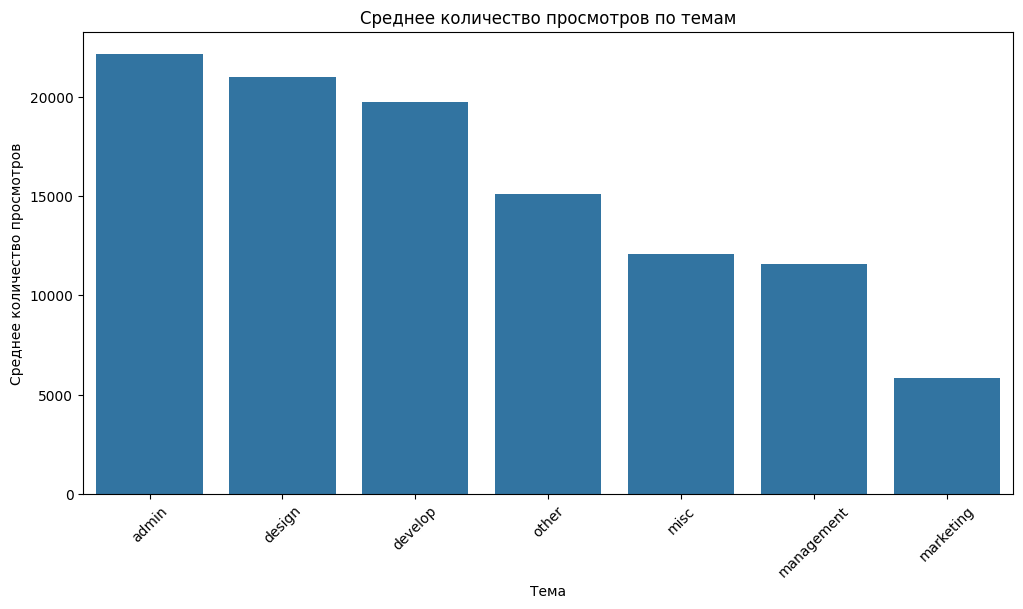

In [ ]:
plt.figure(figsize=(12, 6))
average_views_by_flow = data.groupby('flow')['views'].mean().sort_values(ascending=False)
sns.barplot(x=average_views_by_flow.index, y=average_views_by_flow.values)
plt.title('Среднее количество просмотров по темам')
plt.xlabel('Тема')
plt.ylabel('Среднее количество просмотров')
plt.xticks(rotation=45)
plt.show()

on average, the most viewed category is admin, and the least viewed is marketing.

average number of comments per topic

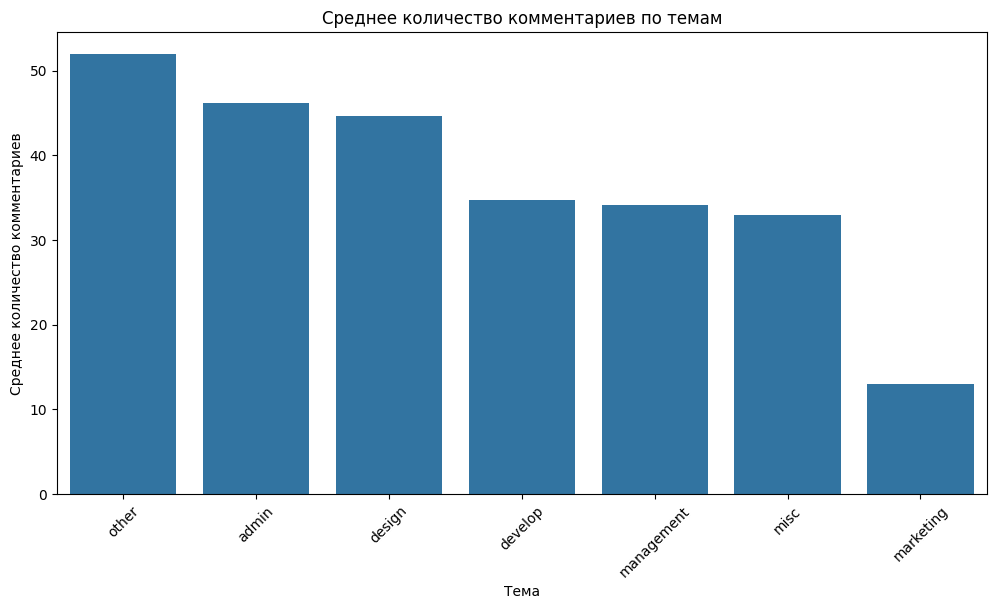

In [ ]:
plt.figure(figsize=(12, 6))
average_comments_by_flow = data.groupby('flow')['comments'].mean().sort_values(ascending=False)
sns.barplot(x=average_comments_by_flow.index, y=average_comments_by_flow.values)
plt.title('Среднее количество комментариев по темам')
plt.xlabel('Тема')
plt.ylabel('Среднее количество комментариев')
plt.xticks(rotation=45)
plt.show()

most commented in other, and least commented in marketing

total number of likes by author

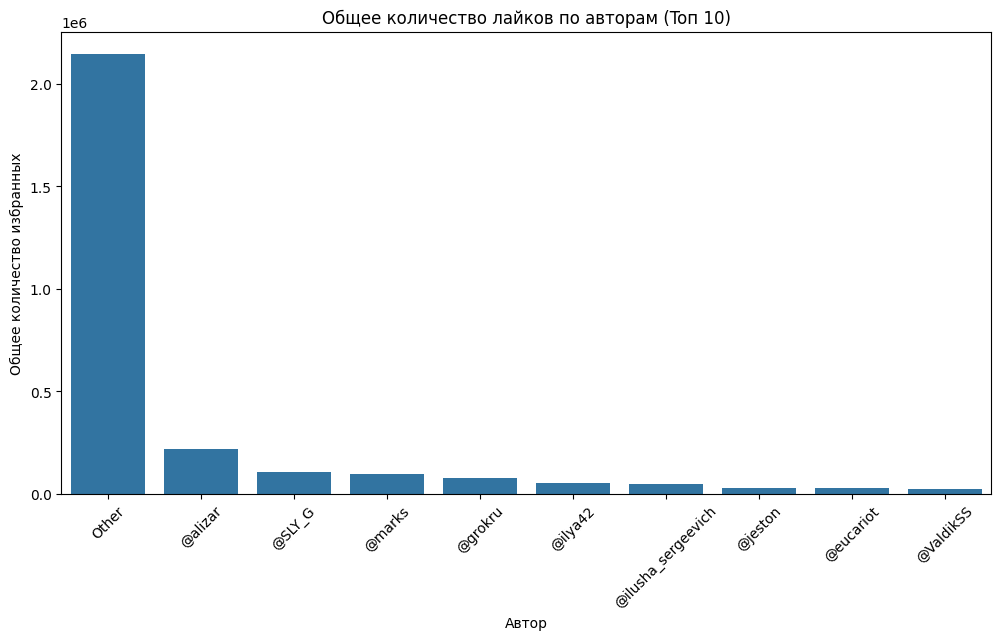

In [ ]:
plt.figure(figsize=(12, 6))
total_favs_by_author = data.groupby('author')['favs'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=total_favs_by_author.index, y=total_favs_by_author.values)
plt.title('Общее количество лайков по авторам (Toп 10)')
plt.xlabel('Автор')
plt.ylabel('Общее количество избранных')
plt.xticks(rotation=45)
plt.show()

more likes from unknown authors

average content length by author

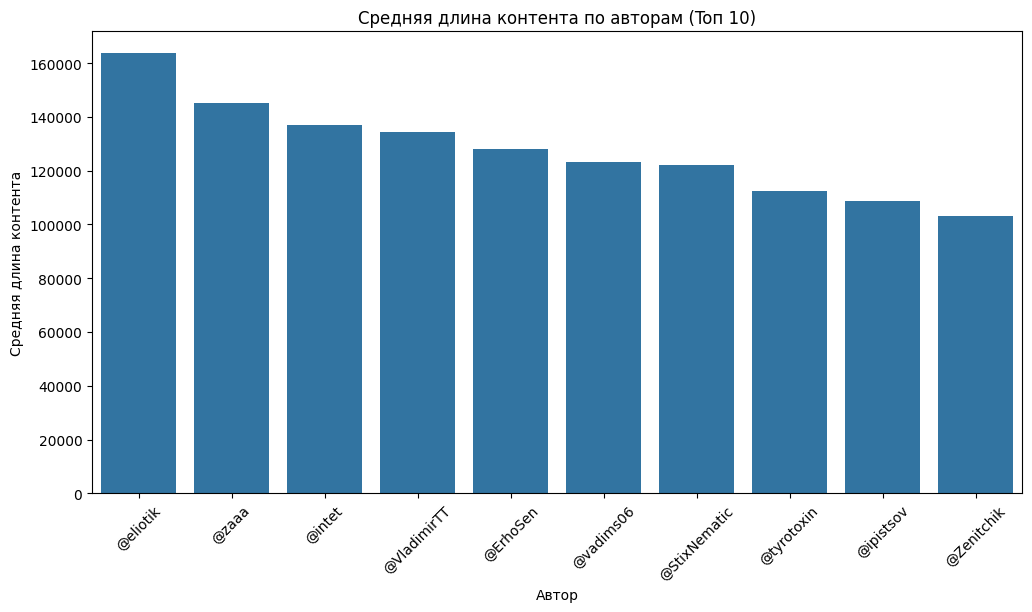

In [ ]:
plt.figure(figsize=(12, 6))
average_content_len_by_author = data.groupby('author')['content_len'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=average_content_len_by_author.index, y=average_content_len_by_author.values)
plt.title('Средняя длина контента по авторам (Toп 10)')
plt.xlabel('Автор')
plt.ylabel('Средняя длина контента')
plt.xticks(rotation=45)
plt.show()

the longest texts are created by eliotik

content length vs. number of views chart

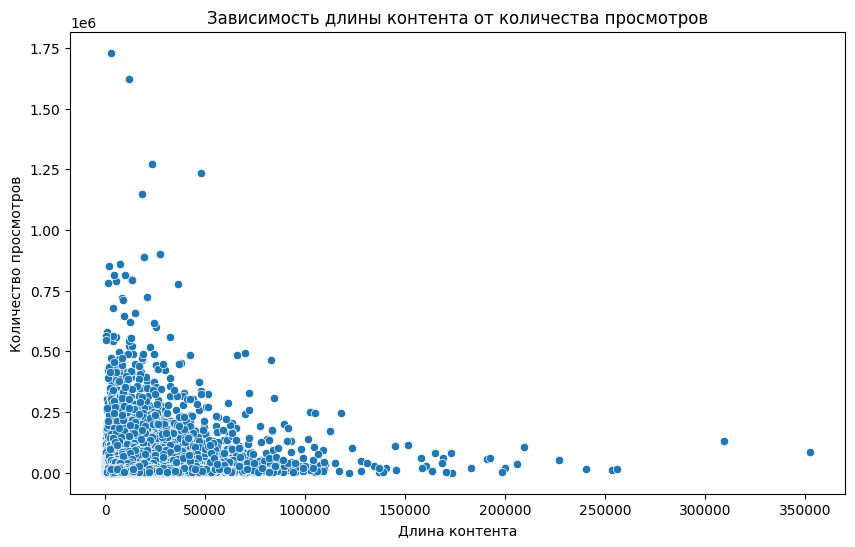

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='content_len', y='views', data=data)
plt.title('Зависимость длины контента от количества просмотров')
plt.xlabel('Длина контента')
plt.ylabel('Количество просмотров')
plt.show()

content up to 100,000 in length is best viewed

posts by Topic Ratio Chart

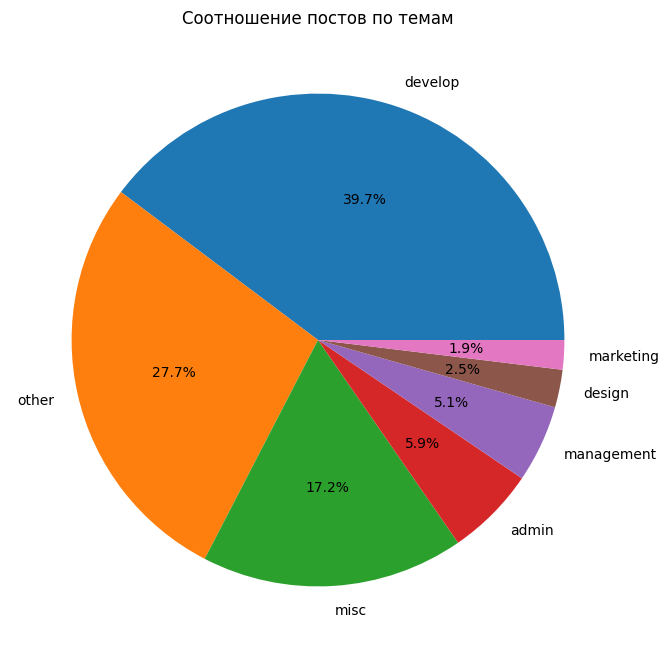

In [ ]:
plt.figure(figsize=(8, 8))
data['flow'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Соотношение постов по темам')
plt.ylabel('')
plt.show()

the most posts (articles) are in the develop category, and the least in the marketing category

let's check the views column for normality using the D'Agostino and Pearson test, because the sample size is quite large.

In [ ]:
stat_views, p_value_views = normaltest(data['views'])

print(f'Статистика теста: {stat_views}')
print(f'p-значение: {p_value_views}')

if p_value_views > 0.05:
    print("Распределение количества просмотров похоже на нормальное.")
else:
    print("Распределение количества просмотров не является нормальным.")

Статистика теста: 212299.08121932458
p-значение: 0.0
Распределение количества просмотров не является нормальным.


let's check the normality of the favs column using the D'Agostino and Pearson test (the choice of test is determined by the sample size)

In [ ]:
stat_favs, p_value_favs = normaltest(data['favs'])

print(f'Статистика теста: {stat_favs}')
print(f'p-значение: {p_value_favs}')

if p_value_favs > 0.05:
    print("Распределение количества лайков похоже на нормальное.")
else:
    print("Распределение количества лайков не является нормальным.")

Статистика теста: 200513.15170863867
p-значение: 0.0
Распределение количества лайков не является нормальным.


let's check the normality of the comments column using the D'Agostino and Pearson test, since there is a lot of data.

In [ ]:
stat_comments, p_value_comments = normaltest(data['comments'])

print(f'Статистика теста: {stat_comments}')
print(f'p-значение: {p_value_comments}')

if p_value_comments > 0.05:
    print("Распределение количества комментариев похоже на нормальное.")
else:
    print("Распределение количества комментариев не является нормальным.")

Статистика теста: 156939.4794138067
p-значение: 0.0
Распределение количества комментариев не является нормальным.


Hypothesis 1: Content length affects the number of views

H0: Content length does not significantly affect the number of views

H1: Content length significantly affects the number of views

Testing this hypothesis can help understand whether the length of a post affects how many views it gets

Let's conduct a correlation analysis

In [ ]:
correlation_1, p_value_1 = stats.pearsonr(data['content_len'], data['views'])

print(f'Коэффициент корреляции: {correlation_1}')
print(f'p-значение: {p_value_1}')

if p_value_1 > 0.05:
    print("Нулевая гипотеза принимается: длина контента не оказывает значимого влияния на количество просмотров.")
else:
    print("Альтернативная гипотеза принимается: длина контента оказывает значимое влияние на количество просмотров.")

Коэффициент корреляции: 0.20410141950743116
p-значение: 0.0
Альтернативная гипотеза принимается: длина контента оказывает значимое влияние на количество просмотров.


Hypothesis 2: The number of upvotes affects the number of likes

H0: The number of upvotes is not related to the number of favorites (likes).

H1: The number of upvotes is related to the number of favorites.

In [ ]:
correlation_2, p_value_2 = stats.pearsonr(data['votes_plus'], data['favs'])

print(f'Коэффициент корреляции: {correlation_2}')
print(f'p-значение: {p_value_2}')

if p_value_2 > 0.05:
    print("Нулевая гипотеза принимается: количество положительных голосов не связано с количеством добавлений в избранное.")
else:
    print("Альтернативная гипотеза принимается: количество положительных голосов связано с количеством добавлений в избранное.")

Коэффициент корреляции: 0.4156193766047242
p-значение: 0.0
Альтернативная гипотеза принимается: количество положительных голосов связано с количеством добавлений в избранное.


Hypothesis 3: The influence of the number of comments on the popularity of posts by topic H0: The number of comments is not related to the number of views depending on the post topic. H1: The number of comments is related to the number of views depending on the post topic.

In [ ]:
agg_data = data.groupby('flow').agg({
    'comments': 'mean',
    'views': 'mean'
}).reset_index()

correlation_3, p_value_3 = stats.pearsonr(agg_data['comments'], agg_data['views'])

print(f'Коэффициент корреляции: {correlation_3}')
print(f'p-значение: {p_value_3}')

if p_value_3 > 0.05:
    print("Нулевая гипотеза принимается: количество комментариев не связано с количеством просмотров в зависимости от темы поста.")
else:
    print("Альтернативная гипотеза принимается: количество комментариев связано с количеством просмотров в зависимости от темы поста.")

Коэффициент корреляции: 0.7563838085901953
p-значение: 0.049096695800151455
Альтернативная гипотеза принимается: количество комментариев связано с количеством просмотров в зависимости от темы поста.
